## Example usage of numpythia and fastjet

In [18]:
import numpy as np
from numpythia import Pythia, STATUS, HAS_END_VERTEX, ABS_PDG_ID
from pyjet import cluster, DTYPE_PTEPM
from pyjet.testdata import get_event
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.colors import LinearSegmentedColormap
from histbook import *
from vega import VegaLite as canvas

In [19]:
selection = ((STATUS == 1) & ~HAS_END_VERTEX &
             (ABS_PDG_ID != 12) & (ABS_PDG_ID != 14) & (ABS_PDG_ID != 16))
params_QCD = {
    "HardQCD:all": "on",
    "Beams:eCM": 13000,
    "PhaseSpace:pTHatMin": 100,
}

params_Higgs = {
    "HiggsSM:all": "on",
    "Beams:eCM": 13000,
}

params_Top = {
    "Top:gg2ttbar": "on",
    "Top:qqbar2ttbar": "on",
    "Beams:eCM": 13000,
}

# define eta and phi ranges and number of bins along each axis
eta_min, eta_max = -4., 4.
extent = eta_min, eta_max, -np.pi, np.pi
bins = 200

In [ ]:
masses_QCD = []
for event in Pythia(params=params_QCD):
    jets = cluster(event.all(selection),R=1,p=-1,ep=True).inclusive_jets()
    if jets:
        # print(jets[0].pt, jets[0].eta, jets[0].phi, jets[0].mass)
        masses_QCD.append(jets[0].mass)
        if len(masses_QCD) > 5: break
array = np.array(masses_QCD)
histogram = Hist(bin("data", 30, 0, 300))
histogram.fill(data=array)
histogram.step("data")

In [ ]:
masses_Higgs = []
for event in Pythia(params=params_Higgs):
    ev = event.all(selection)
    jets = cluster(ev,R=0.4,p=-1,ep=True).inclusive_jets()
    if jets:
        masses_Higgs.append(jets[0].mass + jets[1].mass)

array = np.array(masses_Higgs)
histogram = Hist(bin("data", 30, 0, 300))
histogram.fill(data=array)
histogram.step("data")

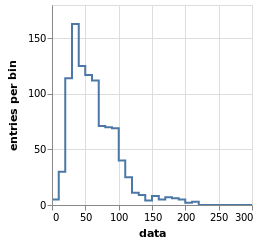

In [10]:
masses_Top = []
for event in Pythia(params=params_Top):
    jets = cluster(event.all(selection),R=1,p=-1,ep=True).inclusive_jets()
    if jets:
        # print(jets[0].pt, jets[0].eta, jets[0].phi, jets[0].mass)
        masses_Top.append(jets[0].mass)
        if len(masses_Top) > 1000: break
array = np.array(masses_Top)
histogram = Hist(bin("data", 30, 0, 300))
histogram.fill(data=array)
histogram.step("data")

[-1.1164676   1.29934981 -0.23772859 ... -0.59719042 -0.77865977
  1.45044657]
